In [1]:
import sys
import os
sys.path.append(os.path.abspath("C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code"))
import hdf5storage
import mat73
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

import CURBD.curbd as curbd
import PyalData.pyaldata as pyaldata

In [2]:
data_dir_WTM350 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/WT-M350/WT-M350-pyaldata2" 
data_dir_WTM355 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/WT-M355/WT-M355-pyaldata2" 
data_dir_ASM351 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/AS-M351/AS-M351-pyaldata2" 
data_dir_ASM354 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/AS-M354/AS-M354-pyaldata2" 
data_dir_PSM365 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/PS-M365/PS-M365-pyaldata2" 
data_dir_PSM366 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/PS-M366/PS-M366-pyaldata2" 

In [3]:
files = os.listdir(data_dir_WTM355)
fpath = os.path.join(data_dir_WTM355, files[12])
df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
df["trial_id"] = range(len(df))
df = pyaldata.combine_time_bins(df, 5)
spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]
for col in spike_fields:
    df = pyaldata.remove_low_firing_neurons(df, col,  1)
for col in spike_fields:
    df = pyaldata.transform_signal(df, col,  'sqrt')
df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
df = pyaldata.add_firing_rates(df, 'smooth')
df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


In [124]:
np.shape(df.all_rates[2])

(101, 235)

In [4]:
concat_all_rates = pyaldata.concat_trials(df[0:1], 'all_rates')
        


In [5]:
list_reset_points = []
for i in range(len(df[0:1])):
    list_reset_points.append(i*101)

list_reset_points

[0]

(82, 1)
trial=0 pVar=0.553164 chi2=0.975791


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


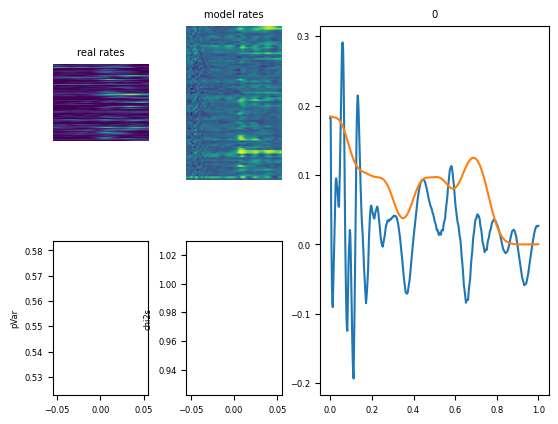

(82, 1)
trial=1 pVar=0.662125 chi2=0.739928
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=2 pVar=0.657670 chi2=0.777735
(82, 1)
trial=3 pVar=0.795402 chi2=0.481419


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=4 pVar=0.822036 chi2=0.401008


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=5 pVar=0.762424 chi2=0.527722
(82, 1)
trial=6 pVar=0.849338 chi2=0.342284
(82, 1)
trial=7 pVar=0.892095 chi2=0.242756


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=8 pVar=0.915268 chi2=0.178969


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=9 pVar=0.927342 chi2=0.166105


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=10 pVar=0.910226 chi2=0.179550


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=11 pVar=0.942275 chi2=0.141641
(82, 1)
trial=12 pVar=0.939235 chi2=0.130674
(82, 1)
trial=13 pVar=0.946576 chi2=0.107409


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=14 pVar=0.959556 chi2=0.092760
(82, 1)
trial=15 pVar=0.954821 chi2=0.104403


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=16 pVar=0.943376 chi2=0.107214
(82, 1)
trial=17 pVar=0.932618 chi2=0.127490
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=18 pVar=0.919832 chi2=0.153390
(82, 1)
trial=19 pVar=0.950972 chi2=0.132284


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=20 pVar=0.954212 chi2=0.092290


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=21 pVar=0.926231 chi2=0.129529
(82, 1)
trial=22 pVar=0.932652 chi2=0.127042
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=23 pVar=0.968244 chi2=0.067991
(82, 1)
trial=24 pVar=0.972069 chi2=0.057899


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=25 pVar=0.971009 chi2=0.056240


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=26 pVar=0.969367 chi2=0.057390


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=27 pVar=0.968077 chi2=0.059073
(82, 1)
trial=28 pVar=0.967221 chi2=0.060004
(82, 1)
trial=29 pVar=0.966514 chi2=0.060263


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=30 pVar=0.966011 chi2=0.060123


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=31 pVar=0.966075 chi2=0.059274


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=32 pVar=0.966949 chi2=0.057456


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=33 pVar=0.968640 chi2=0.054688
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=34 pVar=0.970917 chi2=0.051254
(82, 1)
trial=35 pVar=0.973363 chi2=0.047682
(82, 1)
trial=36 pVar=0.975557 chi2=0.044516


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=37 pVar=0.977262 chi2=0.042037


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=38 pVar=0.978455 chi2=0.040224
(82, 1)
trial=39 pVar=0.979244 chi2=0.038901
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=40 pVar=0.979765 chi2=0.037889
(82, 1)
trial=41 pVar=0.980134 chi2=0.037061


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=42 pVar=0.980436 chi2=0.036331


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=43 pVar=0.980725 chi2=0.035638
(82, 1)
trial=44 pVar=0.981025 chi2=0.034939
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=45 pVar=0.981336 chi2=0.034212
(82, 1)
trial=46 pVar=0.981643 chi2=0.033464


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=47 pVar=0.981930 chi2=0.032713


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=48 pVar=0.982191 chi2=0.031982
(82, 1)
trial=49 pVar=0.982429 chi2=0.031280
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=50 pVar=0.982642 chi2=0.030613
(82, 1)
trial=51 pVar=0.982824 chi2=0.029992


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=52 pVar=0.982962 chi2=0.029431


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=53 pVar=0.983052 chi2=0.028943
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=54 pVar=0.983093 chi2=0.028531
(82, 1)
trial=55 pVar=0.983091 chi2=0.028190
(82, 1)
trial=56 pVar=0.983056 chi2=0.027908


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=57 pVar=0.983001 chi2=0.027671


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=58 pVar=0.982936 chi2=0.027461


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=59 pVar=0.982873 chi2=0.027264
(82, 1)
trial=60 pVar=0.982821 chi2=0.027064
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=61 pVar=0.982787 chi2=0.026850
(82, 1)
trial=62 pVar=0.982776 chi2=0.026614


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=63 pVar=0.982790 chi2=0.026351


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=64 pVar=0.982832 chi2=0.026059
(82, 1)
trial=65 pVar=0.982900 chi2=0.025741


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=66 pVar=0.982993 chi2=0.025399
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=67 pVar=0.983108 chi2=0.025039
(82, 1)
trial=68 pVar=0.983242 chi2=0.024668


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=69 pVar=0.983392 chi2=0.024291
(82, 1)
trial=70 pVar=0.983554 chi2=0.023915


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=71 pVar=0.983725 chi2=0.023544
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=72 pVar=0.983902 chi2=0.023181
(82, 1)
trial=73 pVar=0.984080 chi2=0.022830


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=74 pVar=0.984257 chi2=0.022492
(82, 1)
trial=75 pVar=0.984429 chi2=0.022173
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=76 pVar=0.984593 chi2=0.021876
(82, 1)
trial=77 pVar=0.984745 chi2=0.021607


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=78 pVar=0.984882 chi2=0.021371
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=79 pVar=0.985002 chi2=0.021172


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=80 pVar=0.985103 chi2=0.021012
(82, 1)
trial=81 pVar=0.985185 chi2=0.020887


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=82 pVar=0.985250 chi2=0.020794
(82, 1)
trial=83 pVar=0.985299 chi2=0.020723
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=84 pVar=0.985334 chi2=0.020668


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=85 pVar=0.985361 chi2=0.020620
(82, 1)
trial=86 pVar=0.985382 chi2=0.020574
(82, 1)
trial=87 pVar=0.985405 chi2=0.020524


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=88 pVar=0.985437 chi2=0.020462
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=89 pVar=0.985486 chi2=0.020383


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=90 pVar=0.985558 chi2=0.020284
(82, 1)
trial=91 pVar=0.985655 chi2=0.020166


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=92 pVar=0.985778 chi2=0.020039
(82, 1)
trial=93 pVar=0.985920 chi2=0.019920
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=94 pVar=0.986072 chi2=0.019830
(82, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=95 pVar=0.986225 chi2=0.019786


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=96 pVar=0.986370 chi2=0.019794
(82, 1)
trial=97 pVar=0.986509 chi2=0.019835
(82, 1)
trial=98 pVar=0.986644 chi2=0.019872


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(82, 1)
trial=99 pVar=0.986783 chi2=0.019864
(82, 1)
trial=100 pVar=0.987023 chi2=0.020779


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [6]:
activity = np.transpose(concat_all_rates)  # transpose to get NxT (neurons x timesteps); input to the RNN is an array NxT of smoothed firing rates

Na = df.m1_rates[0].shape[1]
Nb = df.dcn_rates[0].shape[1]
Nc = df.str_rates[0].shape[1]

regions = []
regions.append(['m1', np.arange(0, Na)])  # region m1 and the array containing indexes of m1 units in activity; order matters so that the indexes matches the order m1, str, dcn, thal in activity
regions.append(['dcn', np.arange(Na, Na + Nb)])  # region str and the array containing indexes of str units in activity
regions.append(['str', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)

model = curbd.trainMultiRegionRNN(activity,
                                  dtData=df.bin_size[0],
                                  dtFactor=5,  # interpolation factor of RNN
                                  regions=regions,
                                  nRunTrain=100,
                                  verbose=True,
                                  plotStatus=True,
                                  nRunFree=1,
                                  resetPoints=list_reset_points)

In [128]:
model

{'regions': array([['m1',
         array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
                51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
                68, 69, 70, 71, 72])                                               ],
        ['dcn',
         array([ 73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
                 86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
                 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
                112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
                125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
                138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
                151, 152, 153, 154, 155, 156, 157,

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

m1_activity = pca.fit_transform(np.transpose(model["Adata"][model["regions"][0,1],303:404]))
m1_activity = np.transpose(m1_activity)

m1_model = pca.fit_transform(np.transpose(model["RNN"][model["regions"][0,1],1515:2020]))
m1_model = np.transpose(m1_model)
plt.plot(m1_model[0], m1_model[1], "cornflowerblue", linestyle="--", linewidth=8)
plt.plot(m1_activity[0], m1_activity[1], "orange", linewidth=8)
#plt.legend(["Model RNN","Experimental Data"], fontsize=20)

ValueError: Found array with 0 sample(s) (shape=(0, 38)) while a minimum of 1 is required by PCA.

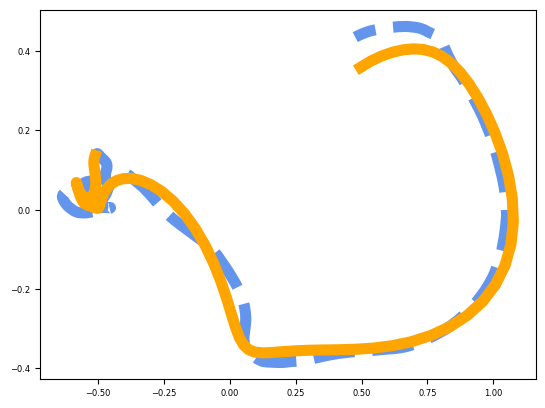

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

m1_activity = pca.fit_transform(np.transpose(model["Adata"][model["regions"][0,1],0:101]))
m1_activity = np.transpose(m1_activity)

m1_model = pca.fit_transform(np.transpose(model["RNN"][model["regions"][0,1],0:505]))
m1_model = np.transpose(m1_model)
plt.plot(m1_model[0], m1_model[1], "cornflowerblue", linestyle="--", linewidth=8)
plt.plot(m1_activity[0], m1_activity[1], "orange", linewidth=8)
#plt.legend(["Model RNN","Experimental Data"], fontsize=20)

In [9]:
[curbd_arr, curbd_labels] = curbd.computeCURBD(model)

In [10]:
df_unbinned = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
df_unbinned = pyaldata.select_trials(df_unbinned, "success == 1")  # only consider successful trials
df_unbinned["trial_id"] = range(len(df_unbinned))
df_unbinned = pyaldata.restrict_to_interval(df_unbinned, "idx_mo", end_point_name=None, rel_start=-250, rel_end=250)  # consider half a second before and after movement onset
concat_all_vel = pyaldata.concat_trials(df_unbinned[0:5], 'vel')

In [133]:
np.shape(concat_all_vel)

(2505,)

In [134]:
np.shape(curbd_arr[0,0][:,0:2505])

(73, 2505)

In [135]:
np.shape(df.vel)

(11,)

In [11]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

m1_model = pca.fit_transform(np.transpose(model["RNN"][model["regions"][2,1],0:505]))
X_train, X_test, y_train, y_test = train_test_split((m1_model), np.transpose(concat_all_vel[0:505]), test_size=0.30, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)
plt.plot(model['tRNN'][0:152],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:152],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())




ValueError: Found input variables with inconsistent numbers of samples: [501, 505]

78.222


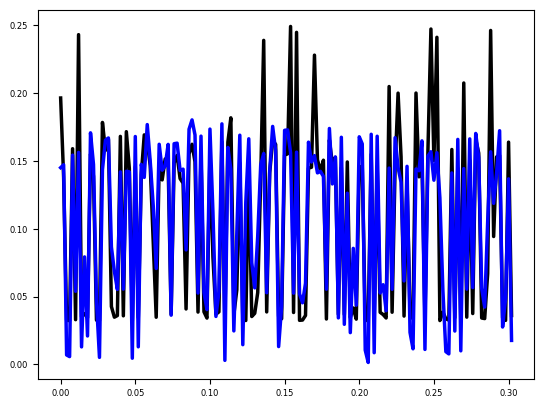

In [137]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

current = pca.fit_transform(np.transpose(curbd_arr[2,1][:,0:505]))
X_train, X_test, y_train, y_test = train_test_split(current, np.transpose(concat_all_vel[0:505]), test_size=0.30, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)
plt.plot(model['tRNN'][0:152],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:152],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())




In [138]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

current_to_vel_regressors = {}

for 


current_to_vel_regressors
current = pca.fit_transform(np.transpose(curbd_arr[2,1][:,0:505]))
X_train, X_test, y_train, y_test = train_test_split(current, np.transpose(concat_all_vel[0:505]), test_size=0.30, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

current_test = pca.fit_transform(np.transpose(curbd_arr[2,1][:,505:1010]))
vel_test = np.transpose(concat_all_vel[505:1010])
vel_predictions = regressor.predict(current_test)

plt.plot(model['tRNN'][0:505],np.transpose(vel_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:505],np.transpose(vel_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())

SyntaxError: invalid syntax (3897697663.py, line 6)

-117.50351


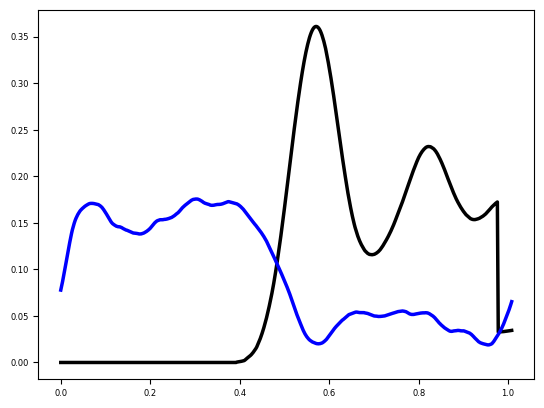

In [139]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

pca = PCA(n_components = 2)

current = pca.fit_transform(np.transpose(curbd_arr[1,0][:,0:1515]))
X_train, X_test, y_train, y_test = train_test_split(current, np.transpose(concat_all_vel[0:1515]), test_size=0.1, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

current_test = pca.fit_transform(np.transpose(curbd_arr[1,0][:,1515:2020]))
vel_test = np.transpose(concat_all_vel[1515:2020])
vel_predictions = regressor.predict(current_test)

plt.plot(model['tRNN'][0:505],np.transpose(vel_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:505],np.transpose(vel_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(vel_test, vel_predictions, decimal=5)
print(evaluator.variance_accounted_for())

92.52687


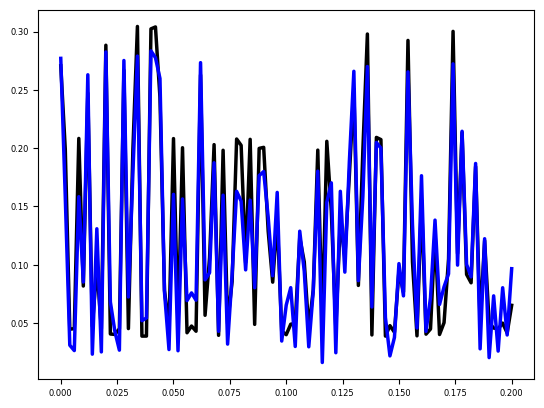

In [28]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

pca = PCA(n_components = 2)

current = pca.fit_transform(np.transpose(curbd_arr[1,0][:,0:501]))
X_train, X_test, y_train, y_test = train_test_split(current, np.transpose(concat_all_vel[0:501]), test_size=0.2, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)

plt.plot(model['tRNN'][0:101],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:101],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())

In [ ]:
np.shape(current)

(505, 5)

In [ ]:
np.shape(curbd_arr[0,0])

(51, 2521)

In [ ]:
for i in range(np.shape(curbd_labels)[0]):
    for j in range(np.shape(curbd_labels)[1]):
        print(curbd_labels[i,j])

m1 to m1
dcn to m1
str to m1
m1 to dcn
dcn to dcn
str to dcn
m1 to str
dcn to str
str to str


In [ ]:
np.shape(curbd_labels)[0]

3

In [ ]:
curbd_labels

array([['m1 to m1', 'dcn to m1', 'str to m1'],
       ['m1 to dcn', 'dcn to dcn', 'str to dcn'],
       ['m1 to str', 'dcn to str', 'str to str']], dtype=object)

In [ ]:
np.shape(current)

(505, 2)

In [ ]:
np.shape(curbd_arr[0,0])

(51, 2521)

In [ ]:
model["regions"][0,0]

'm1'

65.49922


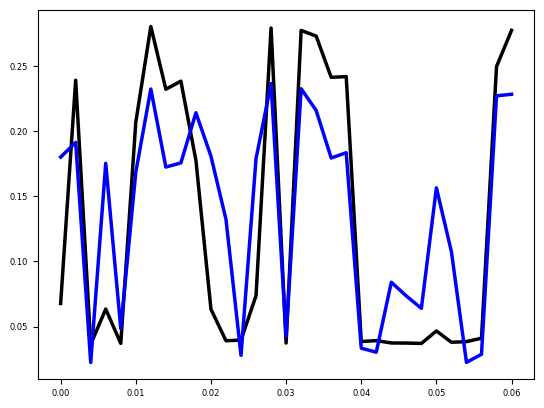

In [ ]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

X_train, X_test, y_train, y_test = train_test_split(np.transpose(m1_activity), np.transpose(concat_all_vel[0:505:5]), test_size=0.30, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)
plt.plot(model['tRNN'][0:31],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:31],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())




In [ ]:
np.shape(m1_model)
np.shape(concat_all_vel[0:505])

(505,)

In [ ]:
np.shape(concat_all_vel[0:505:5])

(101,)

In [ ]:
concat_all_vel[0:505]

array([0.04161312, 0.04161328, 0.04158514, 0.04152951, 0.04148852,
       0.04139796, 0.0413308 , 0.04128988, 0.04120093, 0.04113792,
       0.04105419, 0.0409748 , 0.04088446, 0.04086409, 0.04083827,
       0.04073432, 0.04068216, 0.04059274, 0.0404877 , 0.04041391,
       0.04034185, 0.04021324, 0.04013571, 0.03998704, 0.03984668,
       0.03982934, 0.03978365, 0.03972032, 0.0396729 , 0.03948372,
       0.03941896, 0.03938441, 0.03940765, 0.03932647, 0.03927462,
       0.03922163, 0.0391575 , 0.0391598 , 0.03909987, 0.03906512,
       0.03901166, 0.0388238 , 0.03874048, 0.03870688, 0.03866377,
       0.03861407, 0.03855287, 0.03850546, 0.03845118, 0.03846688,
       0.03844781, 0.03842614, 0.0384033 , 0.03822308, 0.03816513,
       0.03813877, 0.03811143, 0.03809275, 0.03806127, 0.03800477,
       0.03796977, 0.03801386, 0.03796089, 0.03789016, 0.03786692,
       0.03780442, 0.03773894, 0.03770911, 0.03765774, 0.03760156,
       0.03754157, 0.03748855, 0.03741179, 0.03740844, 0.03735

In [ ]:
np.shape(X_train)

(70, 2)

In [ ]:
a = np.asarray(a)

In [ ]:
a[:,1]

array([2, 3])

In [ ]:
a[:,1,np.newaxis]

array([[2],
       [3]])

In [ ]:
np.shape(activity)

(200, 505)

In [ ]:
np.shape(concat_all_rates)

(505, 200)

In [ ]:
len(df)

16